<a href="https://colab.research.google.com/github/YuliiaHudz/Python-Case-Studies/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script is designed to work with a dataset containing **sales data** for a company selling products in both **physical stores** and **online shops**. The goal of the project is to **clean and analyze the data**, identify valuable business insights, and visualize the results. The dataset consists of three CSV files:  

1. **`events.csv`** – Contains sales data over several years.  
2. **`products.csv`** – Contains product categories and product codes.  
3. **`countries.csv`** – Contains country, region data, and their respective codes.  

### **Project Steps and Workflow:**

---

### **1. Data Overview** (Understand the dataset and its contents):

- **Load the dataset** and inspect the contents of each CSV file.
- **Describe the columns** and understand the relationship between the tables.
- Identify **key fields** that link all three tables together, allowing for meaningful analysis (such as product IDs, country codes, etc.).

---

### **2. Data Cleaning** (Prepare the data for analysis):

- **Missing Data**: Check each table for missing values, calculate their proportion, and try to understand the causes of missing data. Based on the analysis, decide whether to **fill or drop** the missing values.
- **Data Types**: Ensure that the data types for each column are correct. For example, dates should be in `datetime` format, numeric fields should be of a numeric type, and so on. If there are discrepancies, convert columns to the correct data types.
- **Duplicates**: Check for duplicates in the dataset. This can be tricky if there are extra spaces, case differences (uppercase vs. lowercase), or similar characters (e.g., Cyrillic vs. Latin). Remove duplicates after addressing the cause.
- **Anomalies**: Look for any **outliers or anomalies** (e.g., sales values that are unusually high or low) and try to understand their causes. This step ensures the data is clean for meaningful analysis.

---

### **3. Data Analysis and Visualization** (Analyze and visualize the data):

- **Join the three tables** into a single DataFrame for easier analysis, and remove unnecessary columns that are not relevant.
- **Key Metrics**: Start with important **key performance indicators (KPIs)** like:
  - Total number of orders.
  - Total profit.
  - Total number of countries covered.
  - Other custom metrics based on the data, like average order value, order frequency, etc.
  
- **Sales Analysis**: Analyze sales across the following dimensions and create visualizations:
  - **Product Categories**: Revenue, profit, and sales volume for each product category.
  - **Geography**: Sales by country and region.
  - **Sales Channels**: Compare **online vs. offline sales** (e.g., sales revenue, order count).
  
- **Order and Shipping Time Analysis**:
  - Analyze the **time between order and shipment** for different categories, countries, and regions.
  - Create visualizations to compare this shipping time across different dimensions.
  - Analyze whether **shipping time affects profit** by visualizing the relationship between shipping duration and profit.
  
- **Sales Trends**: Create visualizations showing sales trends over time (e.g., **monthly or yearly trends**). Look for:
  - **Trends by product categories**.
  - **Trends by country or region**.
  - **Seasonality**: Analyze sales by **day of the week** to determine if any products are seasonal. You can use the method `day_name()` to find the day of the week for each sale.

---

### **4. Reporting** (Create a detailed report):

- Document the entire analysis process in a **Google Colab file**:
  - Include code, **visualizations**, and **explanations** of the results.
  - Provide **business insights** based on the analysis, such as:
    - Which product categories are the most profitable.
    - How geography and sales channels affect sales and profit.
    - Whether product demand varies by day of the week, indicating seasonality.
    - How shipping time affects customer satisfaction or profits.
    
- **Conclusion**: Summarize the findings and draw **business conclusions** based on the data analysis. These insights can guide future business decisions.

---

### **Final Deliverable:**
- A **Google Colab report** with all the code, visualizations, and business insights that can be used as a real-world project in a **data analytics portfolio**.
  
The **goal of this script** is to not only clean and analyze the dataset but also to derive meaningful **insights** that can be used to drive business decisions, like improving product offerings, optimizing shipping processes, or exploring new markets. The detailed reporting will showcase both the technical and analytical skills necessary to handle real-world datasets.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to Google Drive (works in Google Colab)
from google.colab import drive
drive.mount("/content/drive")

# Changing the working directory to the folder containing the CSV files
%cd /content/drive/MyDrive/Mate_Homework/Final_project/

# Loading the CSV files
products_data = pd.read_csv("products.csv")
events_data = pd.read_csv("events.csv")
countries_data = pd.read_csv("countries.csv")

# Displaying the first few rows for an overview
print("Products Data Sample:")
print(products_data.head())

print("\nEvents Data Sample:")
print(events_data.head())

print("\nCountries Data Sample:")
print(countries_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_Homework/Final_project
Products Data Sample:
     id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

Events Data Sample:
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     11

In [ ]:
# Displaying information about the structure of the data
print("\nProducts Data Info:")
print(products_data.info())

print("\nEvents Data Info:")
print(events_data.info())

print("\nCountries Data Info:")
print(countries_data.info())


Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes
None

Events Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   flo

# Checking for missing values

In [ ]:
print("\nMissing Values in Products Data:")
print(products_data.isnull().sum())

print("\nMissing Values in Events Data:")
print(events_data.isnull().sum())

print("\nMissing Values in Countries Data:")
print(countries_data.isnull().sum())


Missing Values in Products Data:
id           0
item_type    0
dtype: int64

Missing Values in Events Data:
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

Missing Values in Countries Data:
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


1. The **Products Data** table is complete, and no values are missing.
2. The **Events Data** table has minor missing values, with 6.17% in Country Code and 0.15% in Units Sold, likely caused by incomplete data entry or reporting errors. *The Country Code* is critical for country-based analysis, but it can be challenging to restore country codes based on other data. Removing rows with missing values in this column is reasonable to avoid distorting geographic analysis. *The Units Sold* can be filled with the column's mean value. This approach preserves the data volume and minimizes the impact of missing values on calculations.
3. **The Countries Data** table has missing values in these columns: alpha-2, region, and sub-region. Filling missing values with "Unknown" helps ensure that the dataset remains complete, without sacrificing data integrity. This method is preferred over removing rows, as it avoids the loss of potentially useful data while providing a clear indication that the values are missing or unknown.


In [ ]:
# Remove rows with missing values in "Country Code"
events_data_cleaned = events_data.dropna(subset=["Country Code"]).copy()

# Fill missing values in "Units Sold" with the column's mean
units_sold_mean = events_data_cleaned["Units Sold"].mean()
events_data_cleaned["Units Sold"] = events_data_cleaned["Units Sold"].fillna(units_sold_mean)

# Verify the result
print(events_data_cleaned.isnull().sum())

# Create a copy of the original data
countries_data_cleaned = countries_data.copy()

# Fill missing values in `alpha-2`, `region`, and `sub-region` with 'Unknown'
countries_data_cleaned["alpha-2"] = countries_data_cleaned["alpha-2"].fillna("Unknown")
countries_data_cleaned["region"] = countries_data_cleaned["region"].fillna("Unknown")
countries_data_cleaned["sub-region"] = countries_data_cleaned["sub-region"].fillna("Unknown")

# Verify the result
print(countries_data_cleaned.isnull().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


# Checking for duplicates

In [ ]:
print("\nDuplicate Rows in Products Data:")
print(products_data.duplicated().sum())

print("\nDuplicate Rows in Events Data:")
print(events_data_cleaned.duplicated().sum())

print("\nDuplicate Rows in Countries Data:")
print(countries_data_cleaned.duplicated().sum())

# Cleaning extra spaces and standardizing text columns
# Stripping leading/trailing spaces and converting text to uppercase
events_data_cleaned["Country Code"] = events_data_cleaned["Country Code"].str.strip().str.upper()
countries_data_cleaned["alpha-3"] = countries_data_cleaned["alpha-3"].str.strip().str.upper()


Duplicate Rows in Products Data:
0

Duplicate Rows in Events Data:
0

Duplicate Rows in Countries Data:
0


# Converting data types

In [ ]:
# Converting types for Events Data
events_data["Order ID"] = events_data["Order ID"].astype("int64")  # Ensure it's int64
events_data["Product ID"] = events_data["Product ID"].astype("int64")  # Ensure it's int64
events_data["Order Date"] = pd.to_datetime(events_data["Order Date"], errors="coerce")  # Convert to datetime
events_data["Ship Date"] = pd.to_datetime(events_data["Ship Date"], errors="coerce")  # Convert to datetime

# Handle missing values in "Units Sold" and convert to float64
events_data["Units Sold"] = events_data["Units Sold"].astype("float64")  # Ensure it's float64

# Converting types for Countries Data
countries_data["alpha-2"] = countries_data["alpha-2"].astype("category")  # Convert to category
countries_data["alpha-3"] = countries_data["alpha-3"].astype("category")  # Convert to category

# Check data types after conversion
print(products_data.dtypes)
print(events_data.dtypes)
print(countries_data.dtypes)

id            int64
item_type    object
dtype: object
Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object
name            object
alpha-2       category
alpha-3       category
region          object
sub-region      object
dtype: object


# Merge all the tables

In [ ]:
# Merge the tables on 'Country Code' (from events_data) and 'alpha-3' (from countries_data)
merged_data = pd.merge(events_data, countries_data[["name", "alpha-3", "region", "sub-region"]], left_on="Country Code", right_on="alpha-3", how="inner")

# Drop the 'alpha-3' column, as we now have the country name
merged_data = merged_data.drop(columns=["alpha-3"])

# Rename 'name' to 'Country Name' for clarity
merged_data = merged_data.rename(columns={"name": "Country Name"})

# Now, merge the result with Products Data on 'Product ID' and 'id'
final_merged_data = pd.merge(merged_data, products_data, left_on="Product ID", right_on="id", how="inner")

# Remove unnecessary columns

In [ ]:
# Drop the 'id' column from Products Data as it's no longer needed
final_merged_data = final_merged_data.drop(columns=["id"])

# Drop the 'Product ID' column from Products Data as it's no longer needed
final_merged_data = final_merged_data.drop(columns=["Product ID"])

# Drop the 'Country Code' column from Products Data as it's no longer needed
final_merged_data = final_merged_data.drop(columns=["Country Code"])

# Rename columns

In [ ]:
# Rename columns to snake_case for consistency and clarity
final_merged_data = final_merged_data.rename(columns={
    "Order ID": "order_id",
    "Sales Channel": "sales_channel",
    "Order Date": "order_date",
    "Ship Date": "ship_date",
    "Order Priority": "order_priority",
    "Units Sold": "units_sold",
    "Unit Price": "unit_price",
    "Unit Cost": "unit_cost",
    "Country Name": "country",
    "item_type": "product_type",
    "region": "region",
    "sub-region": "sub_region"
})

# Check the cleaned-up data
print(final_merged_data.head())

    order_id order_date  ship_date order_priority sales_channel  units_sold  \
0  100640618 2014-10-08 2014-10-18              M        Online       650.0   
1  100983083 2016-08-11 2016-08-11              C       Offline      1993.0   
2  102230632 2017-05-13 2017-06-13              L        Online      1171.0   
3  103435266 2012-08-11 2012-09-18              H       Offline      7648.0   
4  103450715 2015-03-15 2015-04-18              H        Online      2220.0   

   unit_price  unit_cost     country  region       sub_region     product_type  
0      205.70     117.11      Norway  Europe  Northern Europe           Cereal  
1      205.70     117.11      Serbia  Europe  Southern Europe           Cereal  
2      109.28      35.84  Montenegro  Europe  Southern Europe          Clothes  
3       47.45      31.79      Serbia  Europe  Southern Europe        Beverages  
4      651.21     524.96    Slovakia  Europe   Eastern Europe  Office Supplies  


# Key metrics calculations

In [ ]:
# Total Number of Orders
total_orders = final_merged_data["order_date"].nunique()
print("Total number of orders:", total_orders)

# Total Profit
final_merged_data["profit"] = (final_merged_data["unit_price"] - final_merged_data["unit_cost"]) * final_merged_data["units_sold"]
total_profit = final_merged_data["profit"].sum()
print("Total profit:", total_profit)

# 3. Total Number of Countries Covered
total_countries = final_merged_data["country"].nunique()
print("Total number of countries covered:", total_countries)

# Average Units Sold Per Order
avg_sales_per_order = final_merged_data["units_sold"].mean()
print("Average units sold per order:", avg_sales_per_order)

# Average Unit Price
avg_unit_price = final_merged_data["unit_price"].mean()
print("Average unit price:", avg_unit_price)

Total number of orders: 995
Total profit: 473709035.05999994
Total number of countries covered: 45
Average units sold per order: 4953.186998394864
Average unit price: 264.1835256410256


In [ ]:
# Profit by Country
profit_by_country = final_merged_data.groupby("country")["profit"].sum().reset_index()
print(profit_by_country)

                   country       profit
0                  Albania  10490706.02
1                  Andorra  15410036.63
2                  Armenia   9422353.18
3                  Austria  10027509.64
4                  Belarus  11852421.05
5                  Belgium   7476060.14
6   Bosnia and Herzegovina  13257602.77
7                 Bulgaria  10408342.61
8                  Croatia   7318229.45
9                   Cyprus  10032220.56
10          Czech Republic  13635593.78
11                 Denmark   9617418.06
12                 Estonia   7828593.56
13                 Finland   7525362.83
14                  France  10842345.66
15                 Georgia   5697679.21
16                 Germany  11582919.10
17                  Greece  12324450.13
18                 Hungary  13786231.03
19                 Iceland   7278112.15
20                 Ireland   9830365.71
21                   Italy  10913921.97
22                  Latvia  10759285.29
23           Liechtenstein   8397411.11


In [ ]:
# Profit by Product Categories
profit_by_product_type = final_merged_data.groupby("product_type")["profit"].sum().reset_index()
print(profit_by_product_type)

       product_type       profit
0         Baby Food  50256042.90
1         Beverages   9051339.06
2            Cereal  40774964.94
3           Clothes  42544746.72
4         Cosmetics  88010907.56
5            Fruits   1280035.35
6         Household  69160454.84
7              Meat  27297727.60
8   Office Supplies  73411976.25
9     Personal Care  13290821.60
10           Snacks  25012661.94
11       Vegetables  33617356.30


In [ ]:
# Sales Distribution by Sales Channel
sales_by_channel = final_merged_data.groupby("sales_channel")["units_sold"].sum().reset_index()
print(sales_by_channel)

  sales_channel  units_sold
0       Offline   3113412.0
1        Online   3045334.0
2        online     12925.0


In [ ]:
# Sales Distribution by Order Priority
sales_by_priority = final_merged_data.groupby("order_priority")["units_sold"].sum().reset_index()
print(sales_by_priority)

  order_priority  units_sold
0              C      3499.0
1              C   1441666.0
2              H   1554265.0
3              L   1515376.0
4              M   1652934.0
5             M       3931.0


In [ ]:
# Sales by Periods (Monthly)
final_merged_data["order_date"] = pd.to_datetime(final_merged_data["order_date"])
sales_by_date = final_merged_data.groupby(final_merged_data["order_date"].dt.to_period("M"))["units_sold"].sum().reset_index()
print(sales_by_date)

   order_date  units_sold
0     2010-01    105713.0
1     2010-02     68209.0
2     2010-03     49618.0
3     2010-04     34618.0
4     2010-05     83044.0
..        ...         ...
86    2017-03     79136.0
87    2017-04     69365.0
88    2017-05     45722.0
89    2017-06     53222.0
90    2017-07     93780.0

[91 rows x 2 columns]


# Vizualizations

In [ ]:
# Create new columns for revenue, cost, and profit calculations
final_merged_data["revenue"] = final_merged_data["units_sold"] * final_merged_data["unit_price"]
final_merged_data["cost"] = final_merged_data["units_sold"] * final_merged_data["unit_cost"]
final_merged_data["profit"] = final_merged_data["revenue"] - final_merged_data["cost"]

In [ ]:
# Analysis by Product Categories
profit_by_product_type = final_merged_data.groupby("product_type")[["revenue", "cost", "profit", "units_sold"]].sum().reset_index()

# Revenue, Cost, Profit by product category

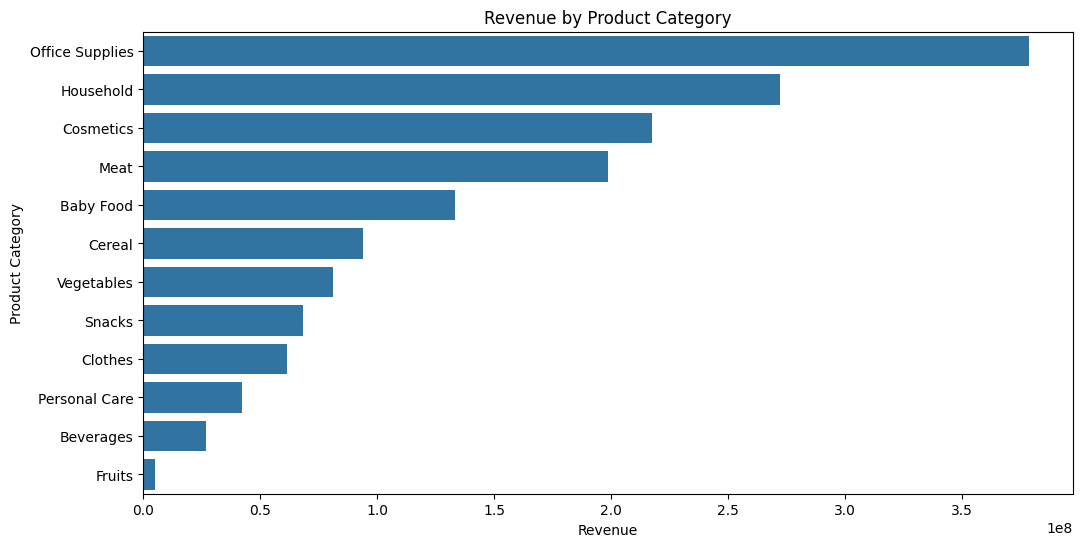

In [ ]:
# Visualization of revenue by product category
plt.figure(figsize=(12, 6))
sns.barplot(x="revenue", y="product_type", data=profit_by_product_type.sort_values("revenue", ascending=False))
plt.title("Revenue by Product Category")
plt.xlabel("Revenue")
plt.ylabel("Product Category")
plt.show()

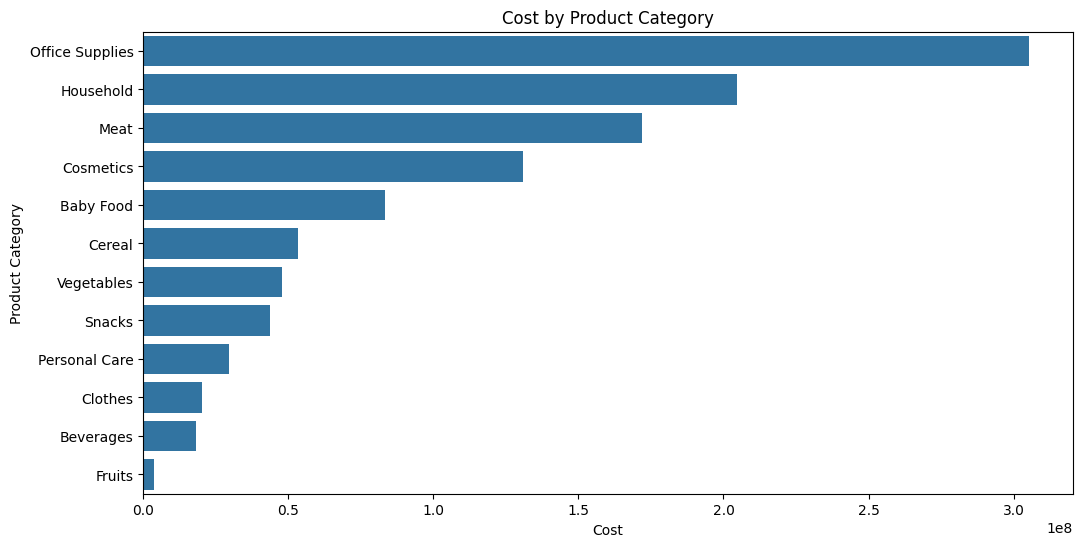

In [ ]:
# Visualization of cost by product category
plt.figure(figsize=(12, 6))
sns.barplot(x="cost", y="product_type", data=profit_by_product_type.sort_values("cost", ascending=False))
plt.title("Cost by Product Category")
plt.xlabel("Cost")
plt.ylabel("Product Category")
plt.show()

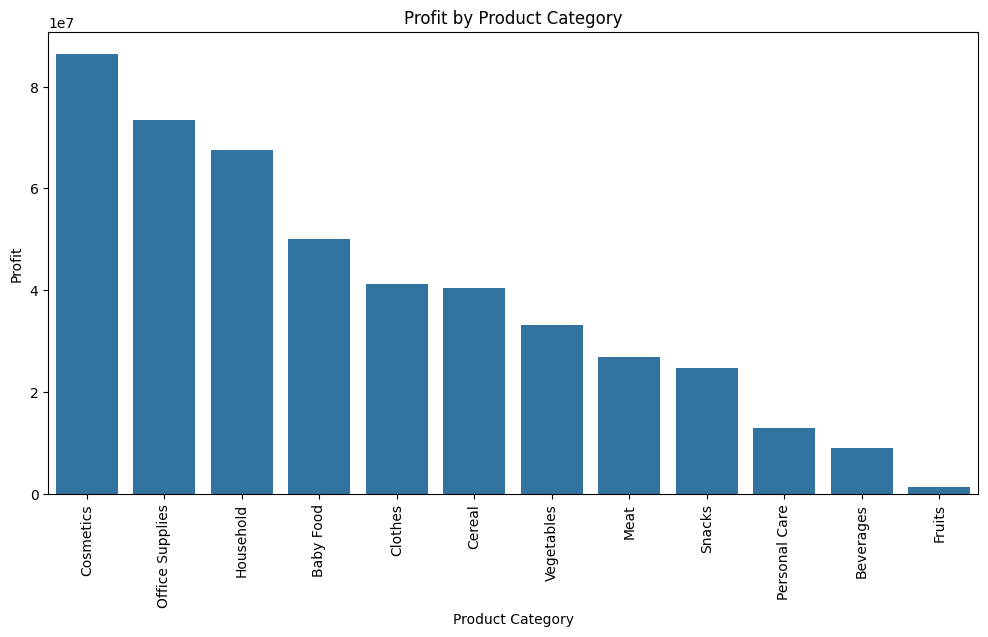

In [ ]:
# Visualization of profit by product category (vertical bar chart with rotated labels)
plt.figure(figsize=(12, 6))
sns.barplot(x="product_type", y="profit", data=profit_by_product_type.sort_values("profit", ascending=False))
plt.title("Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

# Profit by Country, by Region, by Sales Channel

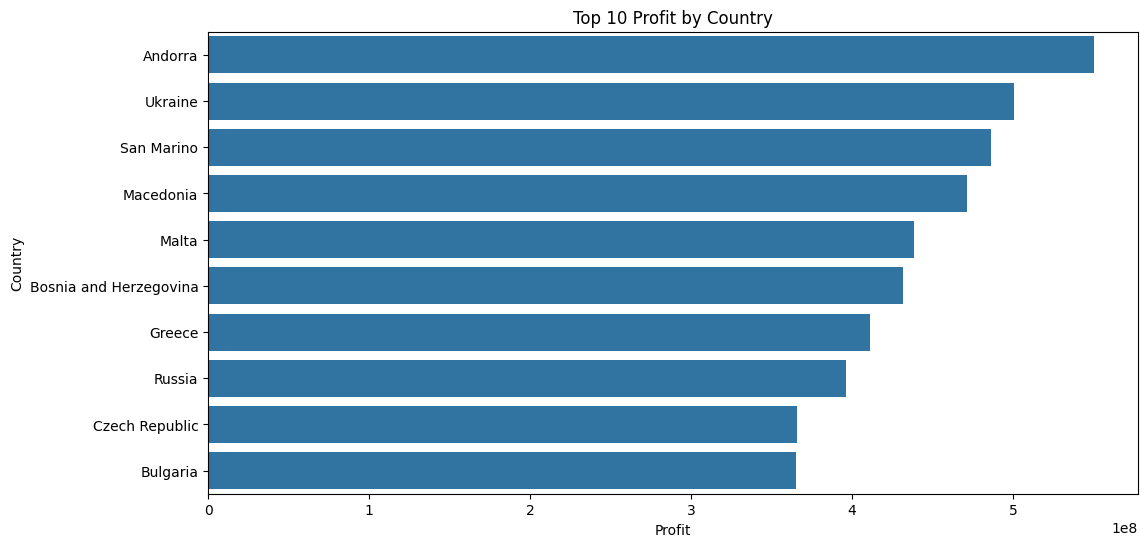

In [ ]:
# Sales analysis by country
profit_by_country = final_merged_data.groupby("country")[["unit_price", "unit_cost", "units_sold"]].sum().reset_index()
profit_by_country["profit"] = (profit_by_country["unit_price"] - profit_by_country["unit_cost"]) * profit_by_country["units_sold"]

# Get top 10 countries by profit
top_10_profit_by_country = profit_by_country.sort_values("profit", ascending=False).head(10)

# Visualization of profit by country (Top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x="profit", y="country", data=top_10_profit_by_country)
plt.title("Top 10 Profit by Country")
plt.xlabel("Profit")
plt.ylabel("Country")
plt.show()

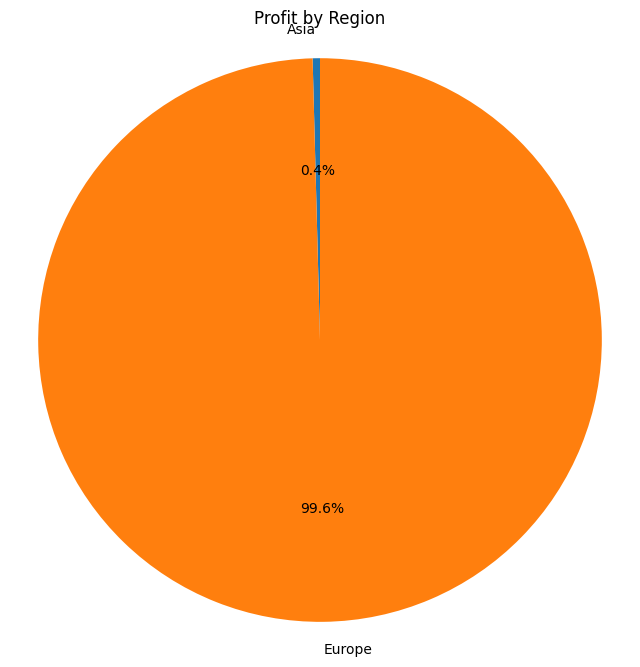

In [ ]:
# Sales analysis by region
profit_by_region = final_merged_data.groupby("region")[["unit_price", "unit_cost", "units_sold"]].sum().reset_index()
profit_by_region["profit"] = (profit_by_region["unit_price"] - profit_by_region["unit_cost"]) * profit_by_region["units_sold"]

# Visualization of profit by region (Pie chart)
plt.figure(figsize=(8, 8))
plt.pie(profit_by_region["profit"], labels=profit_by_region["region"], autopct="%1.1f%%", startangle=90)
plt.title("Profit by Region")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

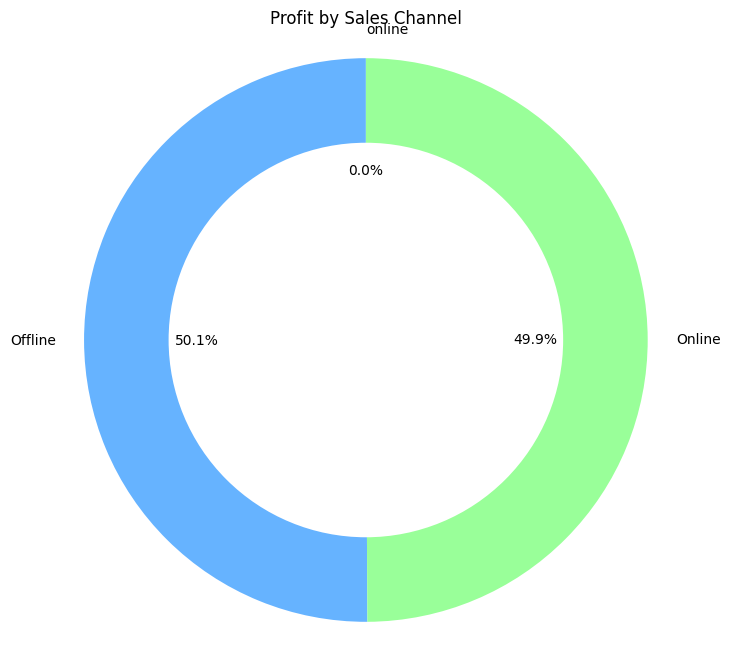

In [ ]:
# Sales analysis by sales channel (Online/Offline)
profit_by_sales_channel = final_merged_data.groupby("sales_channel")[["unit_price", "unit_cost", "units_sold"]].sum().reset_index()
profit_by_sales_channel["profit"] = (profit_by_sales_channel["unit_price"] - profit_by_sales_channel["unit_cost"]) * profit_by_sales_channel["units_sold"]

# Visualization of profit by sales channel (Donut chart)
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(profit_by_sales_channel["profit"], labels=profit_by_sales_channel["sales_channel"], autopct="%1.1f%%", startangle=90, colors=["#66b3ff", "#99ff99"])

# Create a white circle at the center to form the donut
centre_circle = plt.Circle((0,0), 0.70, color="white", lw=0)
plt.gca().add_artist(centre_circle)

plt.title("Profit by Sales Channel")
plt.axis("equal")  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

# Investigating relationships between profit and delivery time

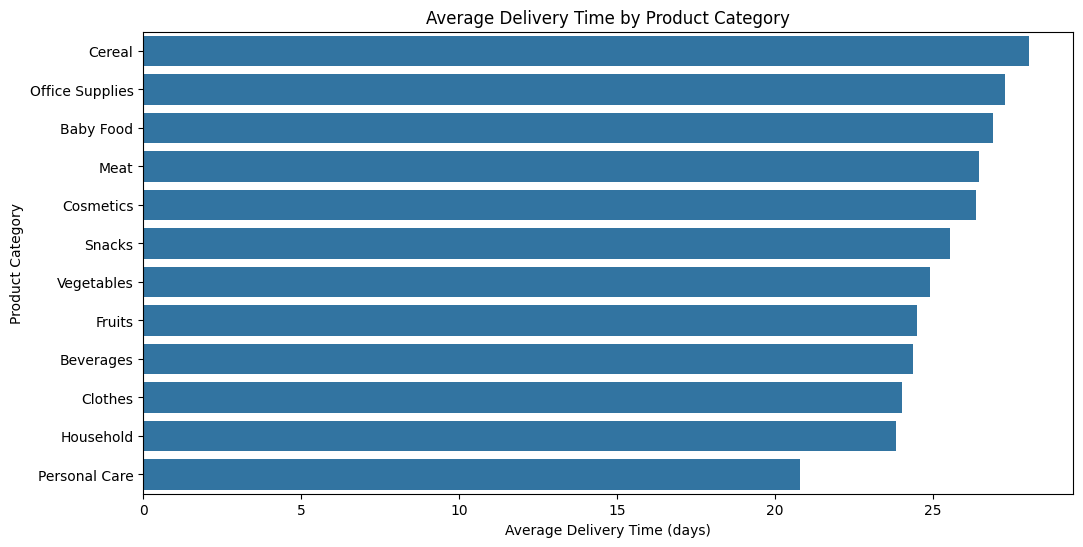

In [ ]:
# Calculate the time difference in days between Order Date and Ship Date
final_merged_data["delivery_time"] = (final_merged_data["ship_date"] - final_merged_data["order_date"]).dt.days

# Sales analysis by Product Category
delivery_time_by_product = final_merged_data.groupby("product_type")["delivery_time"].mean().reset_index()

# Visualization of delivery time by Product Category (Bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(x="delivery_time", y="product_type", data=delivery_time_by_product.sort_values("delivery_time", ascending=False))
plt.title("Average Delivery Time by Product Category")
plt.xlabel("Average Delivery Time (days)")
plt.ylabel("Product Category")
plt.show()

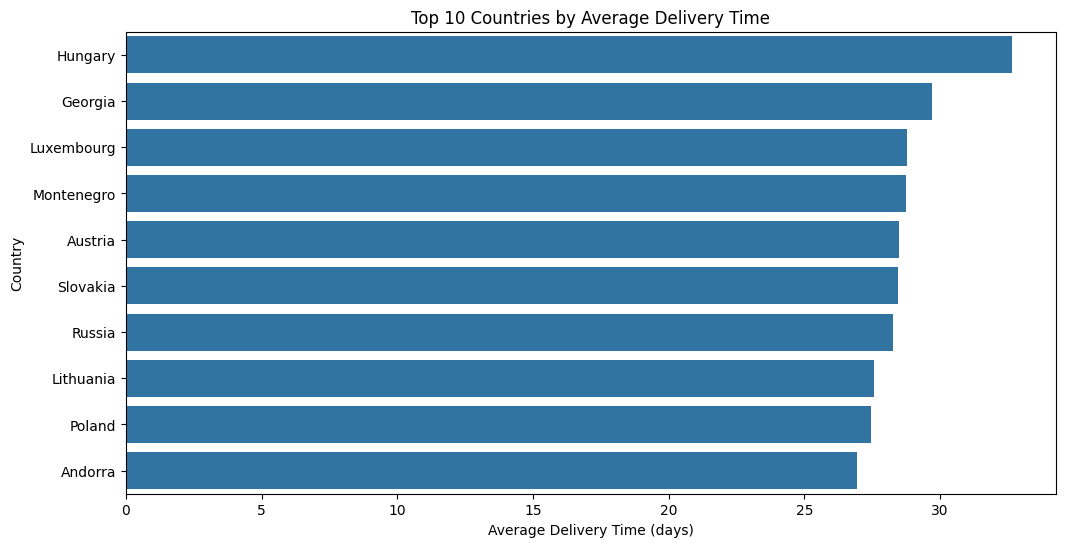

In [ ]:
# Sales analysis by Country - Top 10 countries with the highest average delivery time
delivery_time_by_country = final_merged_data.groupby("country")["delivery_time"].mean().reset_index()

# Sort the countries by average delivery time in descending order and select top 10
top_10_delivery_time_by_country = delivery_time_by_country.sort_values("delivery_time", ascending=False).head(10)

# Visualization of top 10 countries with the highest average delivery time (Bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(x="delivery_time", y="country", data=top_10_delivery_time_by_country)
plt.title("Top 10 Countries by Average Delivery Time")
plt.xlabel("Average Delivery Time (days)")
plt.ylabel("Country")
plt.show()

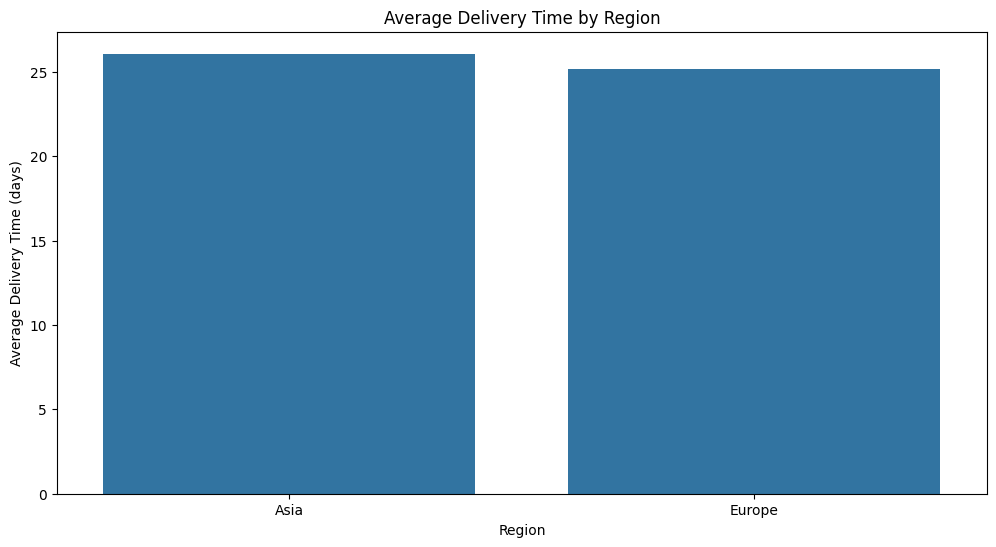

In [ ]:
# Sales analysis by Region - Average delivery time by region
delivery_time_by_region = final_merged_data.groupby("region")["delivery_time"].mean().reset_index()

# Visualization of average delivery time by Region (Column chart)
plt.figure(figsize=(12, 6))
sns.barplot(x="region", y="delivery_time", data=delivery_time_by_region.sort_values("delivery_time", ascending=False))
plt.title("Average Delivery Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Delivery Time (days)")
plt.show()

In [ ]:
# Calculate the profit for each order
final_merged_data["profit"] = (final_merged_data["unit_price"] - final_merged_data["unit_cost"]) * final_merged_data["units_sold"]

# Calculate the average delivery time (delivery_time) for each order
profit_delivery_time = final_merged_data[["profit", "delivery_time"]].groupby("delivery_time").mean().reset_index()

# Print the data for verification
print(profit_delivery_time.head())

   delivery_time         profit
0              1  338390.965263
1              2  346590.220400
2              3  285391.693226
3              4  278809.762593
4              5  417644.889259


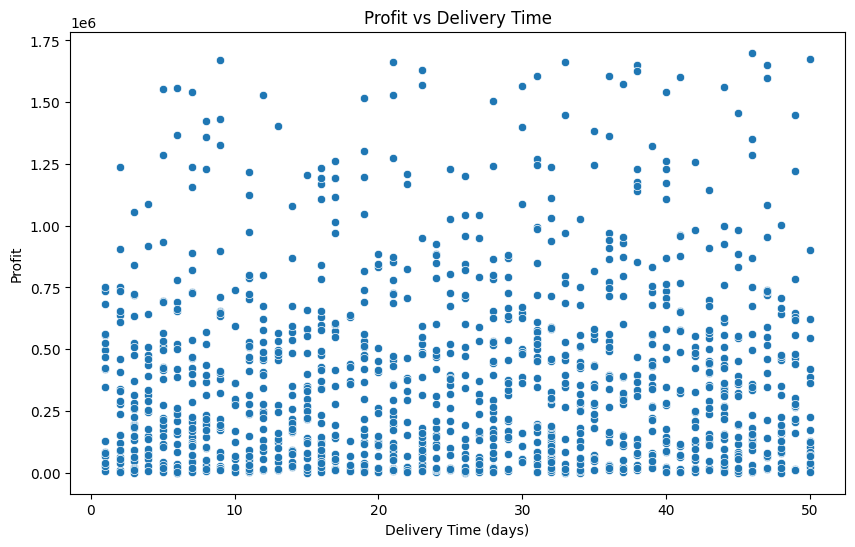

In [ ]:
# Visualization of the relationship between profit and delivery time
plt.figure(figsize=(10, 6))
sns.scatterplot(x="delivery_time", y="profit", data=final_merged_data)
plt.title("Profit vs Delivery Time")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Profit")
plt.show()

In [ ]:
# Calculate the correlation between profit and delivery time
correlation = final_merged_data["profit"].corr(final_merged_data["delivery_time"])
print(f"Correlation between Profit and Delivery Time: {correlation}")

Correlation between Profit and Delivery Time: 0.06069452759496703


**Conclusions:** The correlation coefficient between profit and delivery time is very close to 0, indicating that there is almost no linear relationship between these two variables.

This suggests that the time taken for shipping does not significantly impact the profit generated for the given dataset. In other words, changes in delivery time are not strongly associated with changes in profit.

# Investigating Sales Dynamics (by Product Category, by Country, by Region)over Time

In [ ]:
# Create a new column for total sales (units_sold * unit_price)
final_merged_data["total_sales"] = final_merged_data['units_sold'] * final_merged_data['unit_price']

# Group by order_date (monthly), product_type, country, and region
final_merged_data["month"] = final_merged_data["order_date"].dt.to_period('M')

# Grouping by product category
sales_by_category = final_merged_data.groupby(["month", "product_type"])["total_sales"].sum().reset_index()

# Grouping by country
sales_by_country = final_merged_data.groupby(["month", "country"])["total_sales"].sum().reset_index()

# Grouping by region
sales_by_region = final_merged_data.groupby(["month", "region"])["total_sales"].sum().reset_index()

# Display the results
print("Sales by Product Category:")
print(sales_by_category.head())

print("\nSales by Country:")
print(sales_by_country.head())

print("\nSales by Region:")
print(sales_by_region.head())

Sales by Product Category:
     month product_type  total_sales
0  2010-01    Baby Food   4149321.12
1  2010-01    Beverages    315352.70
2  2010-01       Cereal   4828601.80
3  2010-01      Clothes   1100012.48
4  2010-01    Cosmetics   5452321.20

Sales by Country:
     month                 country  total_sales
0  2010-01                 Andorra   1440093.59
1  2010-01                 Armenia   1858575.21
2  2010-01                 Belarus   1302418.80
3  2010-01  Bosnia and Herzegovina    778723.44
4  2010-01                Bulgaria    836083.62

Sales by Region:
     month  region  total_sales
0  2010-01    Asia   2024251.93
1  2010-01  Europe  18413854.79
2  2010-02    Asia   4822686.48
3  2010-02  Europe  15030336.72
4  2010-03  Europe   8474747.19


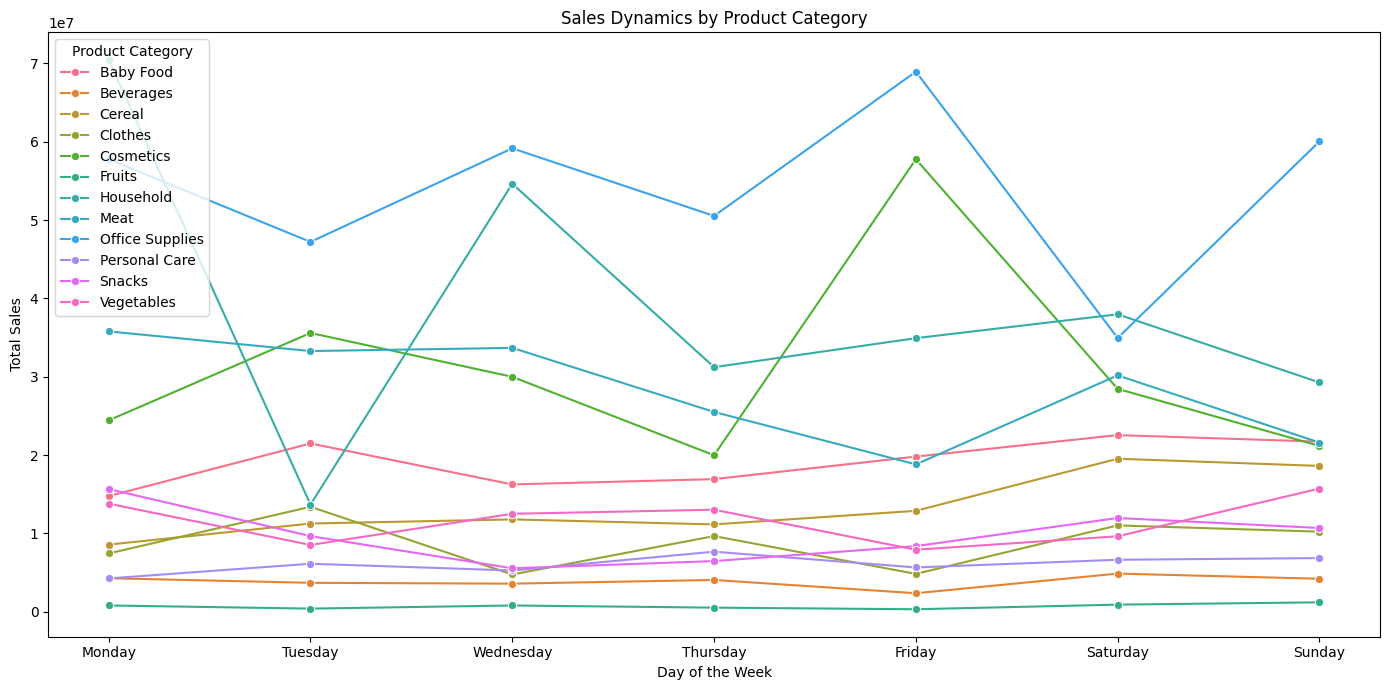

In [ ]:
# Add a "day_of_week" column to get the day of the week
final_merged_data["day_of_week"] = final_merged_data["order_date"].dt.day_name()

# Group the data by "day_of_week" and "product_type", summing up "total_sales"
sales_by_weekday = final_merged_data.groupby(["day_of_week", "product_type"])["total_sales"].sum().reset_index()

# Ensure "day_of_week" is ordered correctly
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_weekday["day_of_week"] = pd.Categorical(sales_by_weekday["day_of_week"], categories=ordered_days, ordered=True)

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_weekday, x="day_of_week", y="total_sales", hue="product_type", marker="o")
plt.title("Sales Dynamics by Product Category")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.legend(title="Product Category", loc="upper left")
plt.tight_layout()
plt.show()


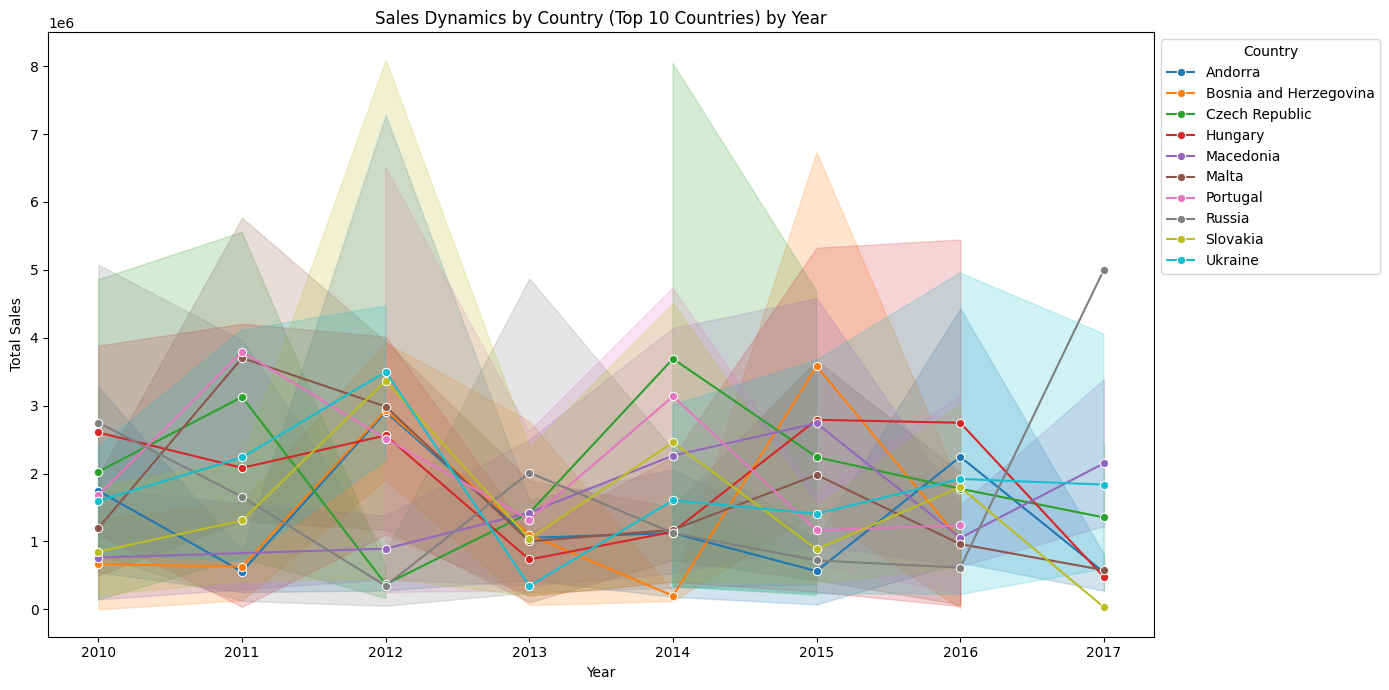

In [ ]:
# Extract the year from the "order_date"
final_merged_data["year"] = final_merged_data["order_date"].dt.year

# Group the data by "country", "year", and "product_type", summing up "total_sales"
sales_by_country_year = final_merged_data.groupby(["country", "year", "product_type"])["total_sales"].sum().reset_index()

# Get the total sales by country to filter the top 10 countries
top_10_countries = sales_by_country_year.groupby("country")["total_sales"].sum().nlargest(10).index

# Filter the data for the top 10 countries
top_10_sales_by_country_year = sales_by_country_year[sales_by_country_year["country"].isin(top_10_countries)]

# Use .loc to avoid the SettingWithCopyWarning
top_10_sales_by_country_year.loc[:, "total_sales"] = pd.to_numeric(top_10_sales_by_country_year["total_sales"], errors="coerce")

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_10_sales_by_country_year, x="year", y="total_sales", hue="country", marker="o")
plt.title("Sales Dynamics by Country (Top 10 Countries) by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



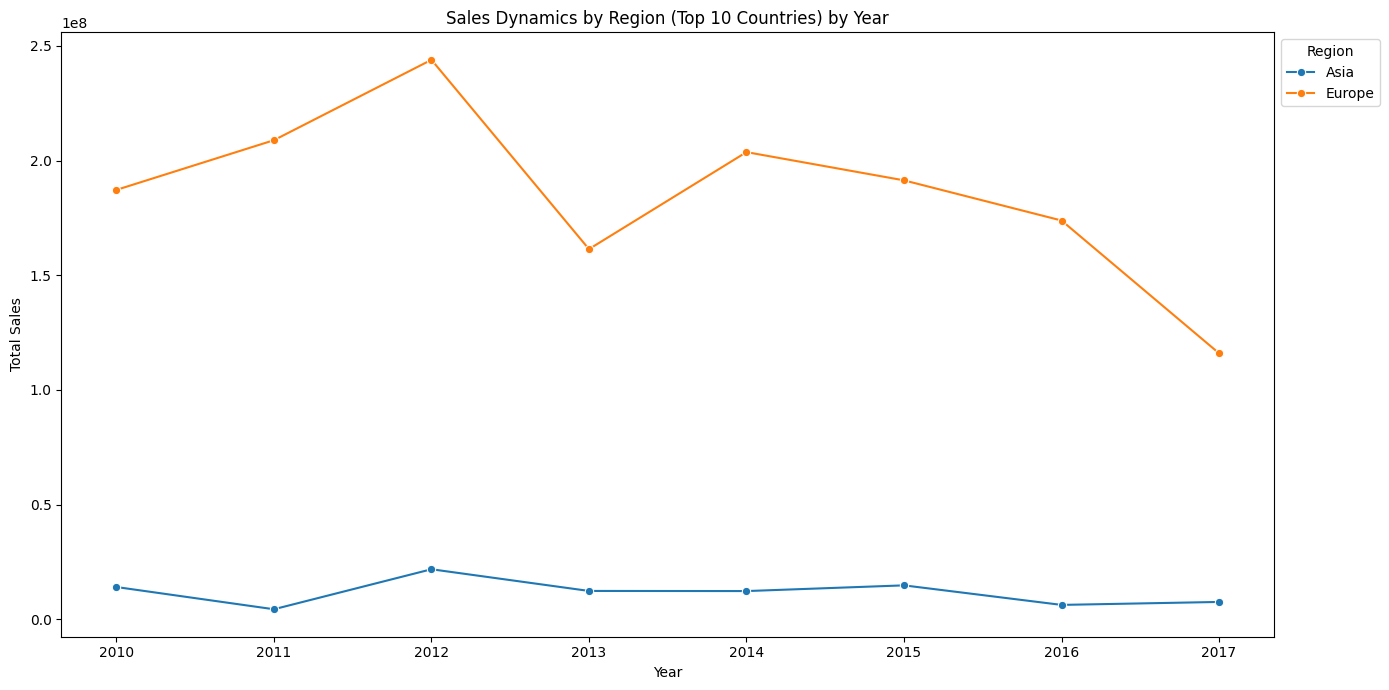

In [ ]:
# Group the data by "year" and "region", summing up "total_sales"
sales_by_region_year = final_merged_data.groupby(["year", "region"])["total_sales"].sum().reset_index()

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_region_year, x="year", y="total_sales", hue="region", marker="o")
plt.title("Sales Dynamics by Region (Top 10 Countries) by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Sales Dynamics by Product Category and Day of the Week

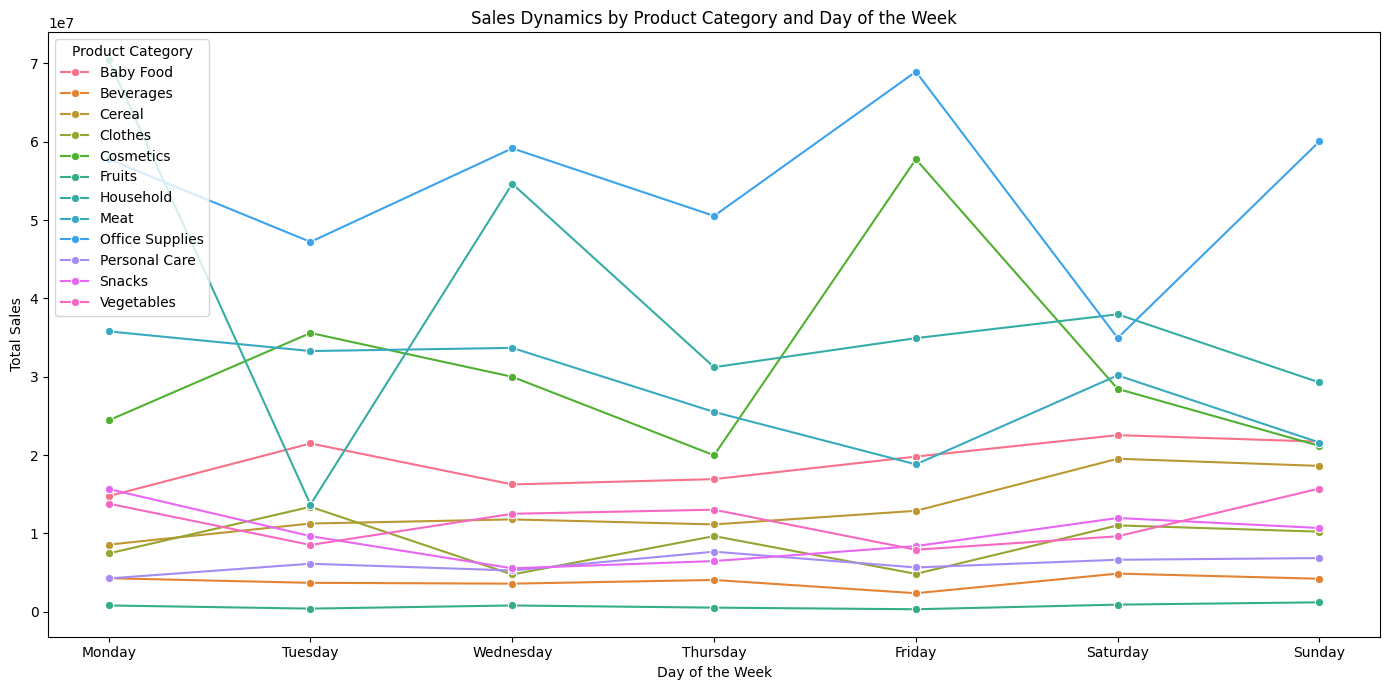

In [ ]:
# Add a 'day_of_week' column to get the day of the week
final_merged_data['day_of_week'] = final_merged_data['order_date'].dt.day_name()

# Group the data by 'day_of_week' and 'product_type', summing up 'total_sales'
sales_by_weekday = final_merged_data.groupby(['day_of_week', 'product_type'])['total_sales'].sum().reset_index()

# Ensure 'day_of_week' is ordered correctly (Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_weekday['day_of_week'] = pd.Categorical(sales_by_weekday['day_of_week'], categories=ordered_days, ordered=True)

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_by_weekday, x='day_of_week', y='total_sales', hue='product_type', marker='o')
plt.title('Sales Dynamics by Product Category and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.legend(title='Product Category', loc='upper left')
plt.tight_layout()
plt.show()


### **Sales Analysis Summary**
- **Profitability:** Total profit of $473,709,035 shows strong performance but masks growth concerns in some regions.
- **Sales Channels:** Even split between online (49.9%) and offline (50.1%), suggesting balanced market strategy; opportunity to boost online sales.
- **Yearly Trends:** Declining sales overall, with positive performance in Western Asia; further regional analysis needed.
- **Weekly Trends:** Friday leads in sales, with Monday strong in Office Supplies and Household; potential for weekday-focused campaigns.
- **Delivery Efficiency:** 25-day delivery time doesn't hurt sales, but streamlining logistics can improve customer satisfaction.
Average Order Value: High-value transactions suggest focusing on high-value customer segments.
- **Top Categories:** Cosmetics, Office Supplies, and Household are the most profitable; focus on enhancing these categories.
Overall, strengthen online sales, optimize logistics, and focus on high-performing regions and categories.